<a href="https://colab.research.google.com/github/lzeng11bc/DNNWithTensorflow/blob/main/ch15_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 15. Processing Sequences Using RNNs and CNNs

## Recurrent Neurons and Layers
* **A recurrent neuural network looks very much like a feedforward neural network, except it also has connections pointing backward.**

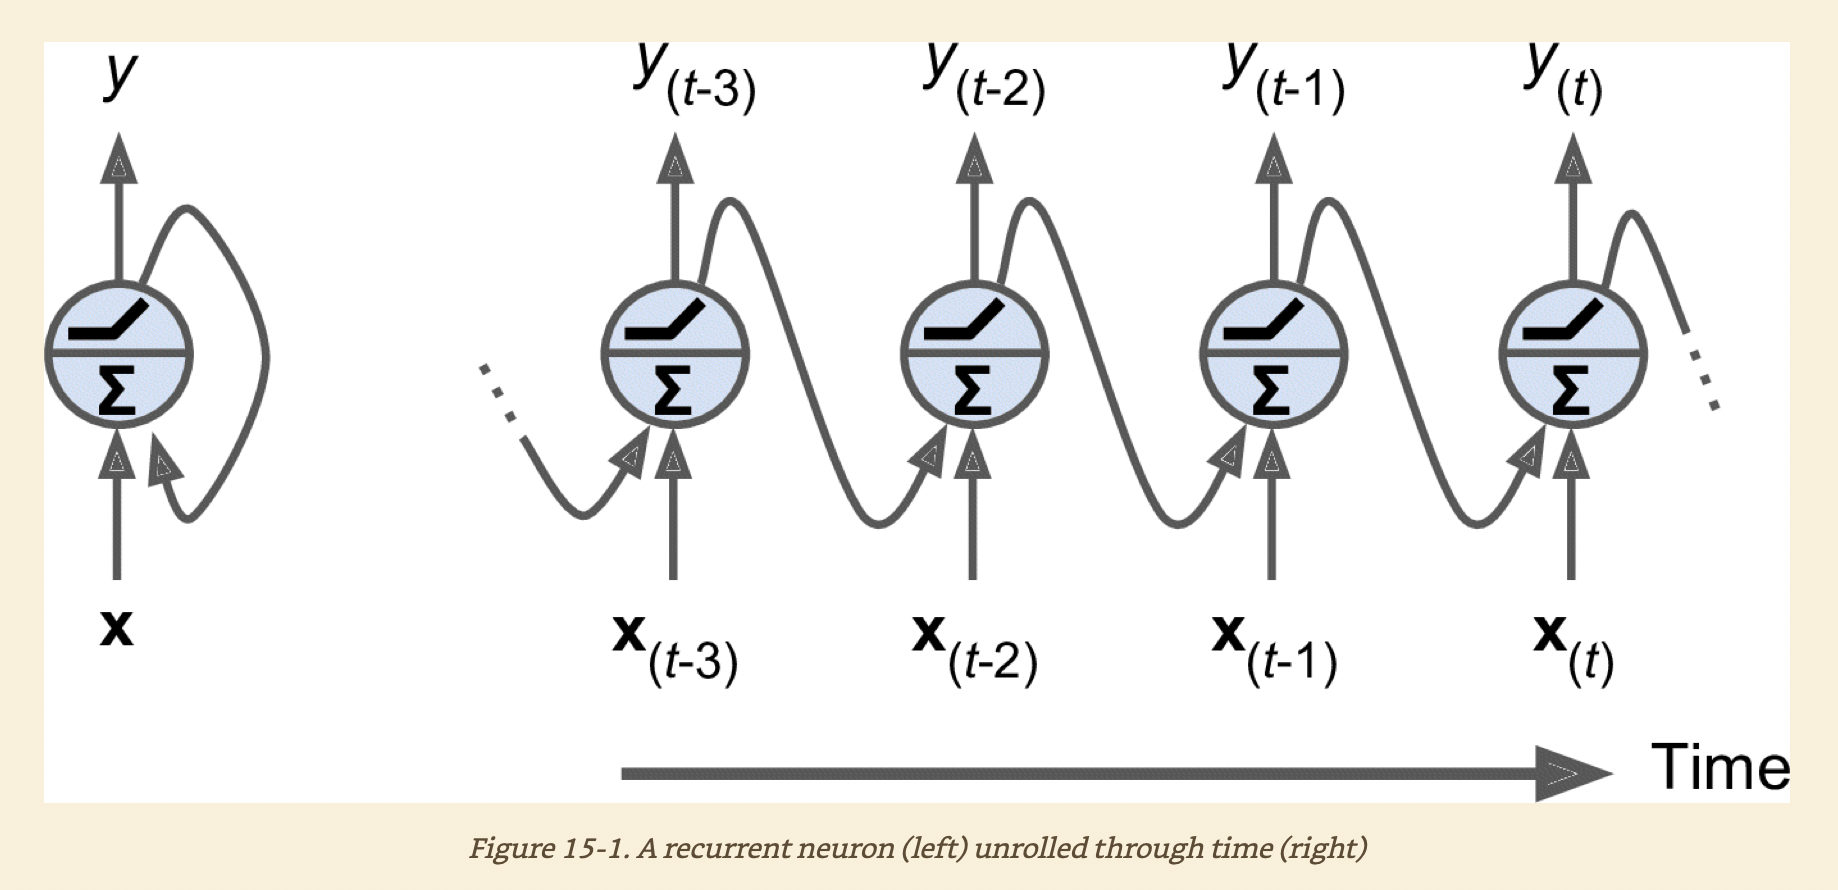

* **In the simplest possible RNN, composed of one neuron receiving inputs, producing an output, and sending tha output back to itself.**
* **At each *time step t*(also called a frame), this *recurrent neuron* receives the inputs $\pmb{x}_{(t)}$ as well as its own output from the previous time step, $y_{t-1}$.** 
    * **Since there is no previous output at first time step, it is generally set to 0.**
* **We can represent this tiny network against the time axis(right), as shown in the figure. This is called *unrolling the network through time*(It is the same recurrent neuron represented once per time step).**

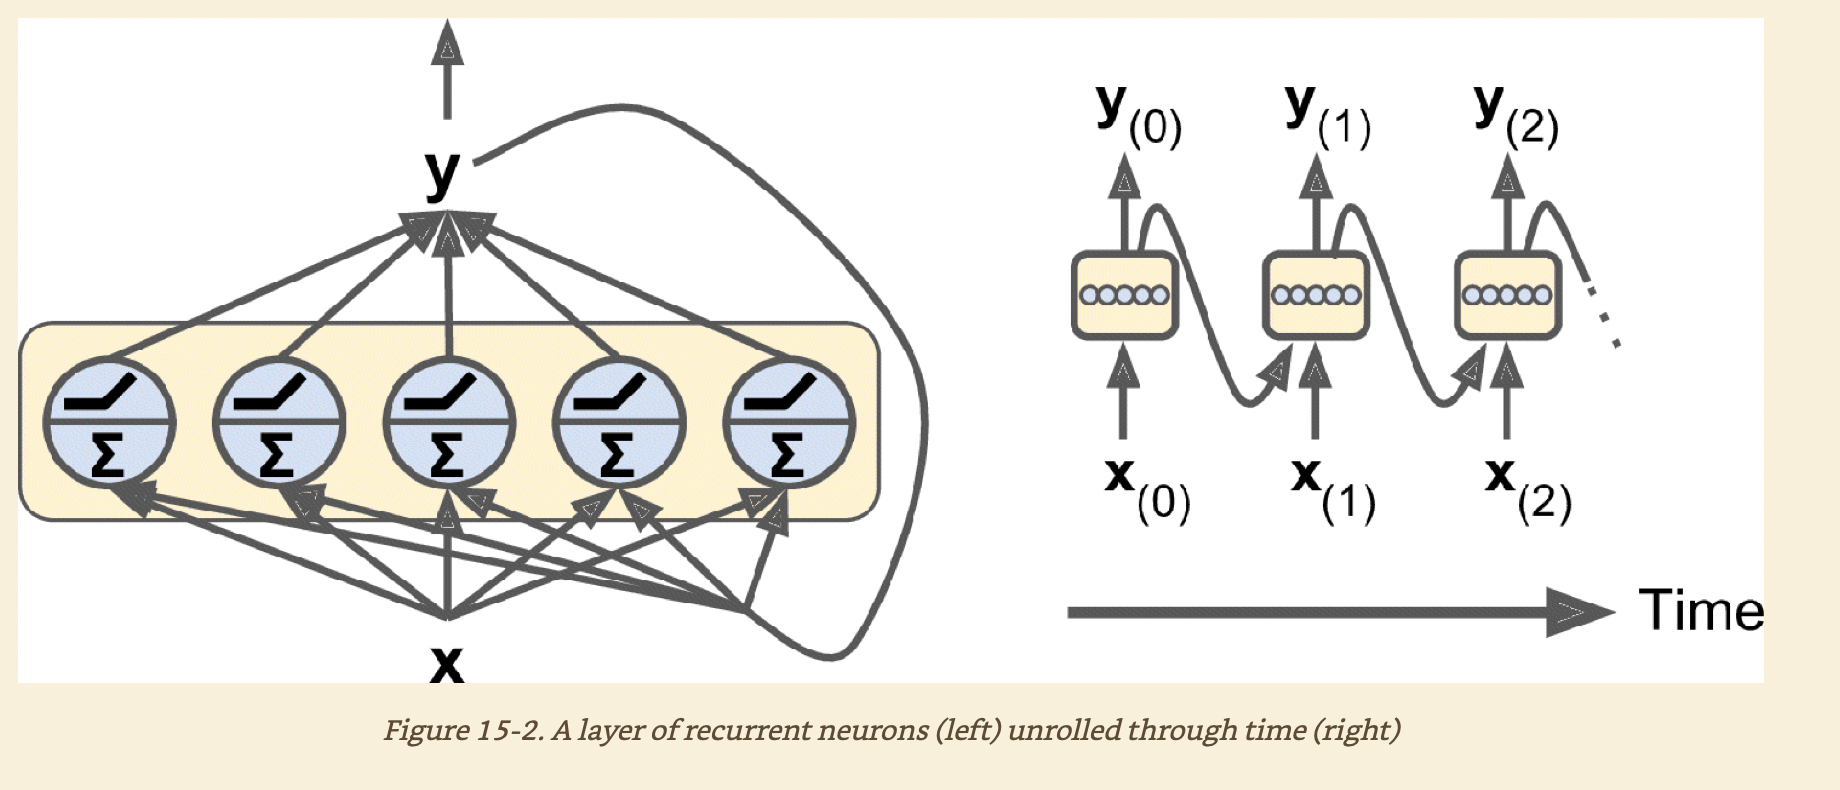

* **You can easily create a layer of recurrent neurons. At each time step $t$, every neuron receives both the input vector $\pmb{x}_{(t)}$ and the output vector from the previous time step $\pmb{y}_{(t - 1)}$**
* **Each recurrent neuron has two sets of weights: one for the inputs $\pmb{x}_{(t)}$ and the other for the outputs of the previous time step, $y_{(t-1)}$. We denote these weights $\pmb{w}_{x}$ and $\pmb{w}_{y}$.** 
* **if we consider the whole recurrent layer instead of just one recurrent neuron, we can place all the weight vectors in two weight matrices, $\pmb{W}_{X}$ and $\pmb{W}_{y}$**
* **The output vector of the whole recurrent layer can then be computed as following:**

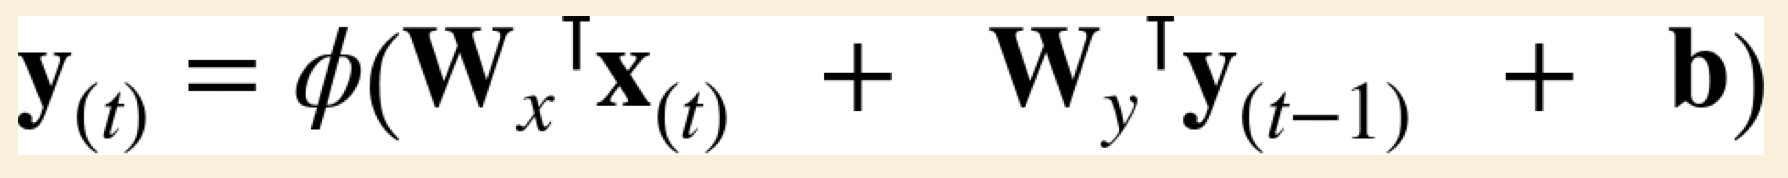

* $\pmb{b}$ **is the bias vector and $\phi( \dot )$ is the activation function(e.g., ReLU)**

* **Just as with feedforward neural networks, we can compute a recurrent layer's output in one shot for a whole mini-batch by placing all the inputs at time step $t$ in an input matrix $\pmb{X}_{(t)}$. See the following equation.**

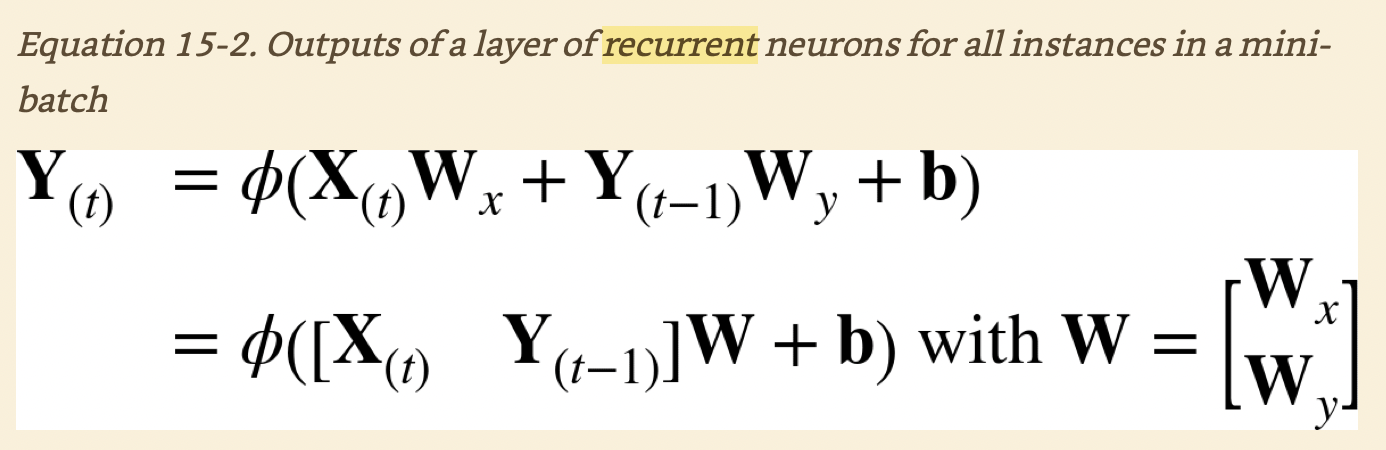

* $\pmb{Y}_{(t)}$ is an $m \times n_{neurons}$ matrix contaiing the layer's outputs time step $t$ for each instance in the mini-batch( $m$ is the number of instances in the mini-batch and $n_{neurons}$ is the number of neurons).**
* **$\pmb{X}_{(t)}$ is an $m \times n_{inputs} $ matrix containing the inputs for all instances.**
* **$\pmb{W}_{x}$ is an $n_{inputs} \times n_{neurons}$ matrix containing the cnnection weights for the inputs of the current time step.**
* **$\pmb{W}_y$ is an $n_{neurons} \times n_{neurons}$ matrix containing the connection weights for the outputs of the previous time step.**
* **$\pmb{b}$ is the vector of size $n_{neurons}$ conataining each neuron's bias term.**
* **The weight matrices $\pmb{W}_x$ and $\pmb{W}_y$ are often concatenated vertically into a single matric $\pmb{W}$ of shape $( n_{inputs} + n_{neurons}) \times n_{neurons}$**
* **The notation $[\pmb{X}_{(t)} \quad \pmb{Y}_{(t-1)}]$ represents the horizontal concatenation of the matrices $ \pmb{X}_{(t)}$ and $\pmb{Y}_{(t-1)}$**
* **Notice that $\pmb{Y}_{(t)}$ is a function of $\pmb{X}_{(t)}$ and $ \pmb{Y}_{(t-1)}$, which is a function of $\pmb{X}_{(t-1)}$ and $\pmb{Y}_{(t-2)}$, which is a function of $\pmb{X}_{(t-2)}$ and $\pmb{Y}_{(t-3)}$.**
* **This makes $\pmb{Y}_{(t)}$ a function of all the inputs since time $t=0$(that is, $\pmb{X}_{(0)}$, $\pmb{X}_{(1)}$, ..., $\pmb{X}_{(t)}$**
* **At the first time step, $t=0$, there are no previous outputs, so they are assumed to be all zeros.**

#### Memory Cells
* **Since the output of a recurrent neuron at tie step $t$ is a functin of all the inputs from previous time steps, you could say it has a form of *memory*.**
* **A part of a neural network that preserveces some state across time steps is called a *memory cell*(or simply a *cell*)**
    * **A single recurrent neuron, or a layer of recurrent neurons, is a very basic cell, capable of learning only short patterns(typically about 10 steps long, but this varies depending on the task).**
* **In general a cell's state at time step $t$, denoted $\pmb{h}_{(t)}$(the "h" stands for "hidden"), is a function of some inputs at that time step and its state at previous stpe: $\pmb{h}_{(t)} = f(\pmb{h}_{(t-1)}, \pmb{x}_{(t)})$.**
    * **Its output at time step t, denoted $\pmb{y}_{(t)}$ is also a function of the previous state and the current inputs.**
    * **In the case of the basic cells, the output is simply equal to the state, but in more complex cells this is not always the case.**

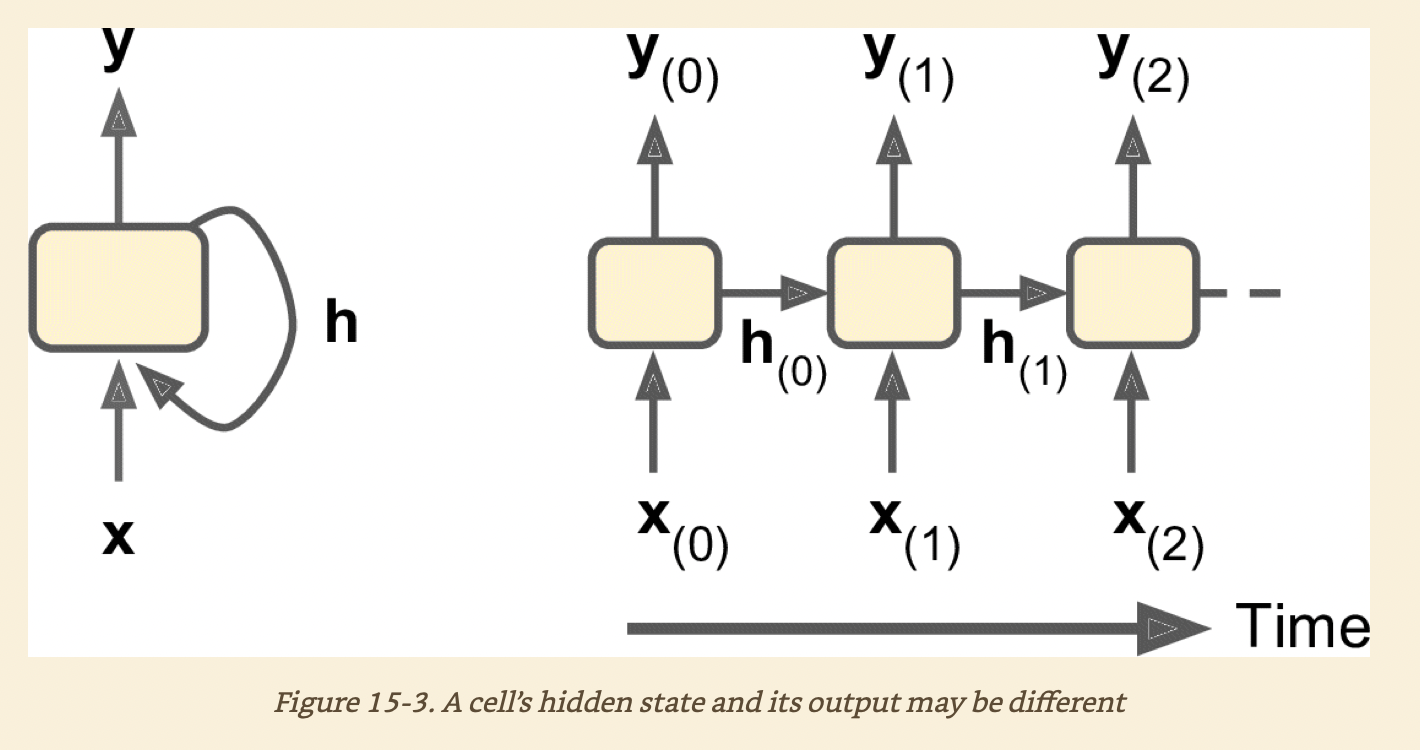

### Input and Output Sequences
* **An RNN can simultaneously take a sequence of inputs and produce a sequence of outputs. This type of *sequence-to-sequence* network is useful for predicting time series.(top left)**
* **Alternatively, you could feed the network a sequence of inputs and ignore all outputs except the last one.(top right)**
    * **In other words, this is a *sequence-to-vector* network.**
* **Conversely, you could feed the network the same input vector over and over again at each time step and let it output a sequence.This is a *vector-to-sequence network*.(bottom left)**
* **Lastly, you could have a sequence-to-vector network, caled an *encoder*, followed by a vector-to-sequence network, called a *decoder*.(bottom right)**
    * **This could be used for translating a sentence from on language to another. You would feed the network a sentence in one language, the encoder would convert this sentence into a single vector representation, and then the deocer would decode this vector into a sentence in another language. This two-step model, called an *Encoder-Decoder*, works much better than trying to tanslate on the fly with a single sequence-to-sequence RNN: the last words of a sentence can affect the first words of the translation, so you need to wait until you have seen the whole sentence before translating it.**

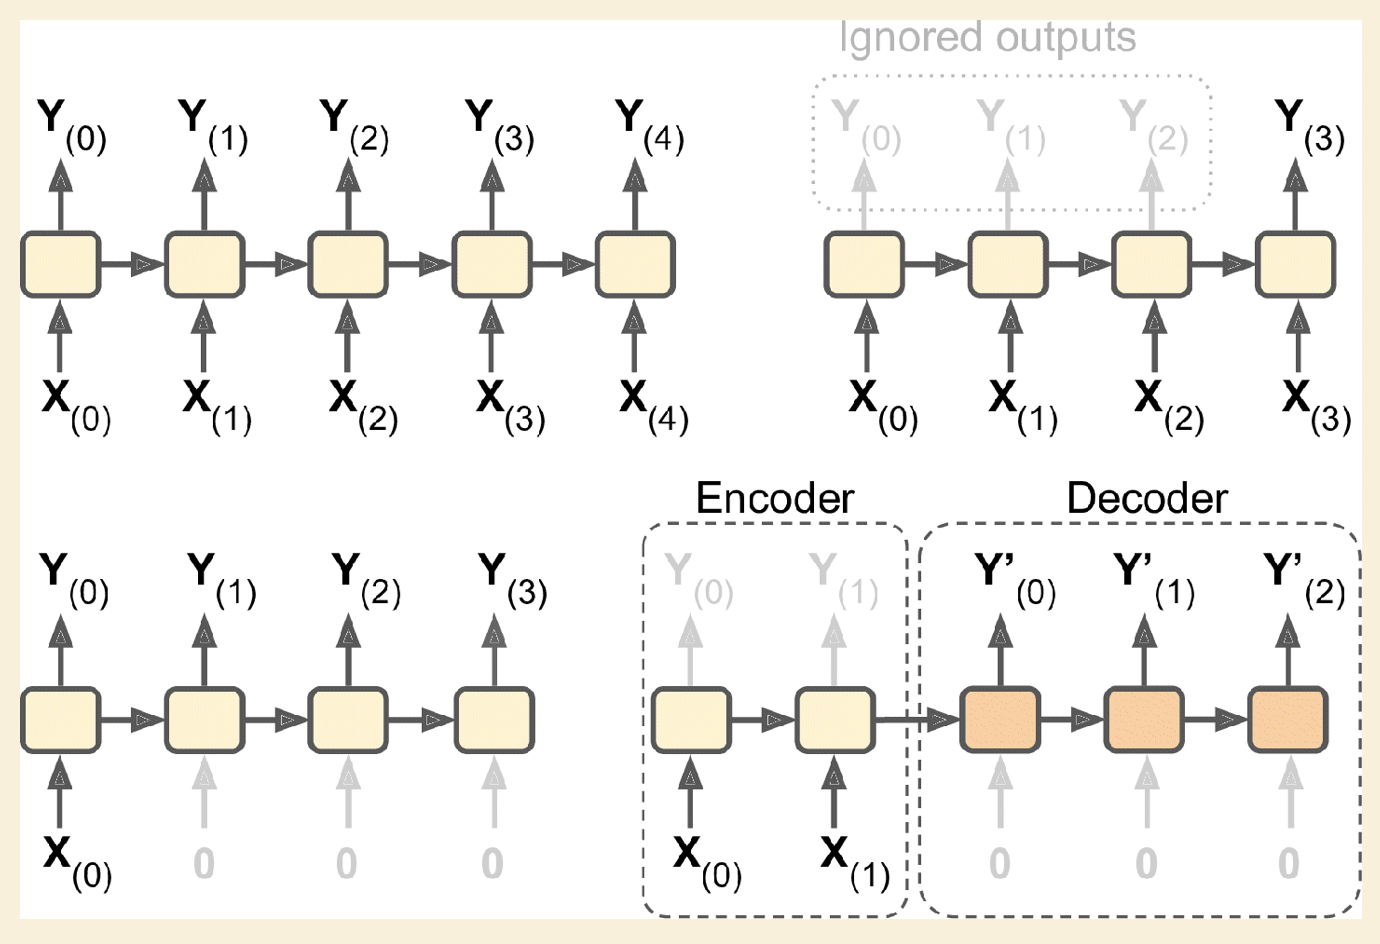

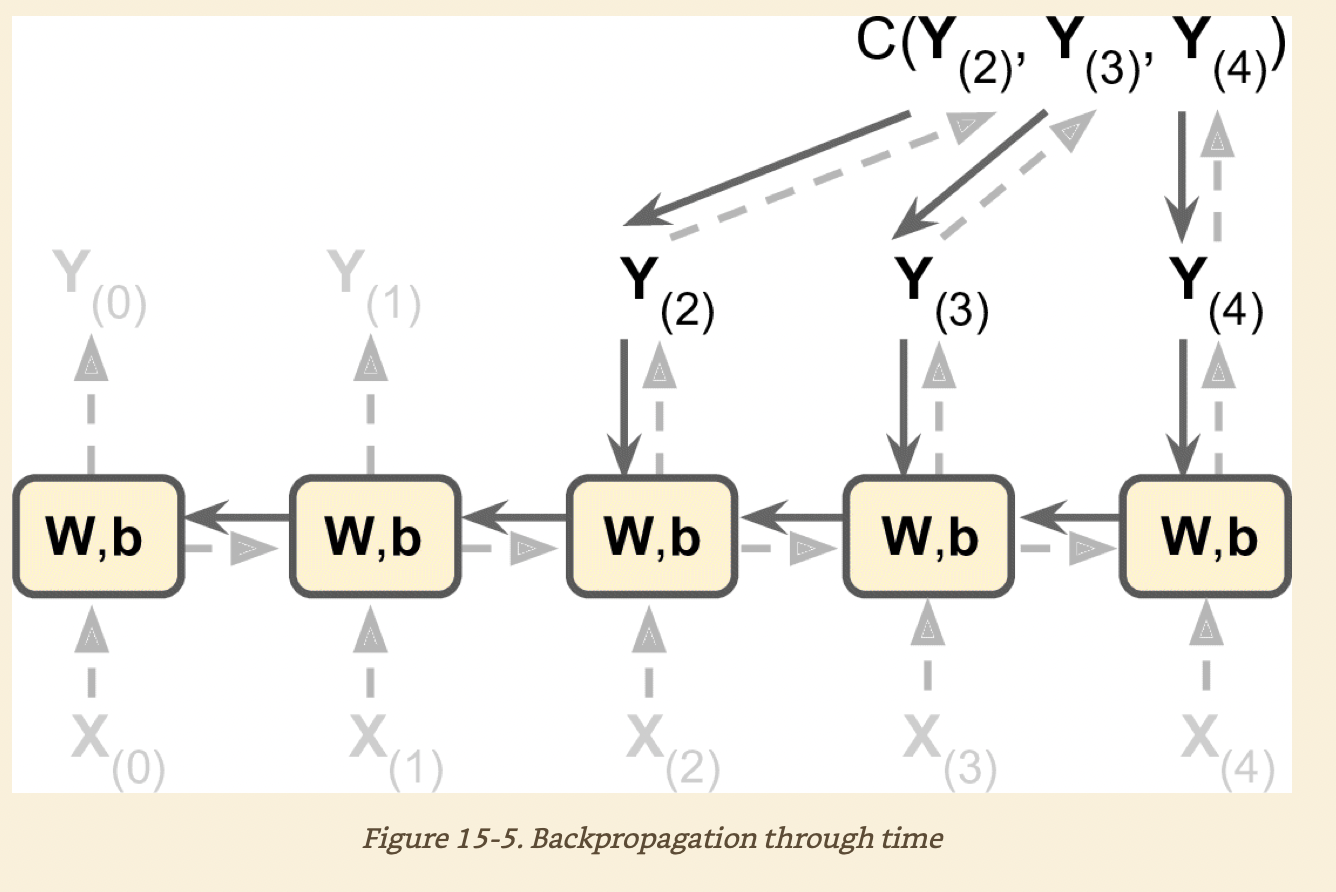

## Training RNNs
* **To train an RNN, the trick is to unroll it through time and simply use regular backpropagation. This strategy is called *backpropagation throgh time*(BPTT)**
* **Just like in regular backpropagtaion, there is a first forward pass through the unrolled network(represented by the dashed arrosw)**
* **Then the output sequence is evaluated using a cost function $C(\pmb{Y}_{(0)}, \pmb{Y}_{(1)}, ..., \pmb{Y}_{(T)}$(where T is the max time step)**
    * **Note that the cost function may ignore some outputs(as in the case of *sequene-to-vector* RNN, all outputs are ignored except for the very last one).**
* **The gradients of that cost function are then propagated backward through the unrolled network(represented by the solid arrows).**
* **Note that the gradients flow backward though all the outputs used by the cost function, not just through the final output(for example, in the figure, the cost function is computed using the last three outputs of the network, $\pmb{Y}_{(2)}$, $\pmb{Y}_{(3)}$, and $\pmb{Y}_{(4)}$, so gradients flow through these three outputs , but not through $\pmb{Y}_{(0)}$ and $\pmb{Y}_{(1)}$). Moreover, since the same parameters $\pmb{W}$ and $\pmb{b}$ are used at each time step, backpropagation will do the right thing and sum over all time steps.**
* **Finally the model parameters are updated using the gradients computed during BPTT.**

## Forecasting a Time Series
* **Time series: the data will  be a seqeunce of one or more values per time step.**
    * ***Univariae time series*: a single value per time stpe**
    * ***multivariate time series*: multiple values per time step.**
    * ***Forecasting*: predict future values.**
    * ***Imputation*: Predic missing values from the past.**

* **Using a time series generated by the** generate\_time\_serires( ) **function, defined here**

In [12]:
import numpy as np

In [13]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise
    return series[..., np.newaxis].astype(np.float32)

* **This function creates as many time series as requested(via the** batch\_size **argument), each of length** n\_steps, **and there is just one value per time step in each series(i.e., all series are univaraite).**
* **This functions retursn a Numpy array of shape** \[batch size, time steps, 1\], **where each series is the sum of two sine waves of fixed amplitudes but random frequencies and phases, plus a bit of noise.**
* **When dealing with time series(and other types of sequences such as sentecnes), the input features are generally represented as 3D arrays of shape \[batch size, time stpes, dimensionality\], where *dimensionality* is 1 for univariate time series and more for multivariate time series.**

**Create a training set, a validation set, and test set using this function:**<br>
* X\_train **contains 7000 time series(i.e., its shape is \[7000, 50, 1\]), while X\_valid contains 2000(from 7000 time series to the 8999) and x\_test contians 1000(from 9000th to the 9999th).** 
* **Since we want to forecast a single value for each time series, the targets are column vectors(e.g., y\_train has a shape of \[7000, 1\])**

In [14]:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

### Baseline Metrics
* **Before we start using RNNs, it is often a good idea to have a few baseline metrics, or else we may end up thinkng our model works great when in fact it is doing worse than basic models.**
    * ***naive forecasting*: the simplest approach is to predict the last value in each series.**

In [16]:
import tensorflow as tf
from tensorflow import keras

In [8]:
# naive forecasting
y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020838834

* **Another simple approach is to use a fully connected network. Since it expects a flat list of features for each input, we need to add a** Flaten **layer.**
* **Let's use a simple Linear regression model so that each prediction will be a linear combination of the values in the time series.**

In [19]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[50, 1]),
                                 keras.layers.Dense(1)
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='MSE', optimizer="Adam")

In [19]:
model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 2/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 3/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 4/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 7/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 8/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 9/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 10/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0032

In [20]:
model.evaluate(x=X_valid, y=y_valid)

63/63 [==============================] - 0s 752us/step - loss: 0.0032


0.0031928292009979486

### Implementing a Simple RNN
* **Let's see if we can beat linear regression with a simple RNN**

In [5]:
model = keras.models.Sequential([
                                 keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

* **That's really the simplest RNN you can build. It just contains a single layer, with a single neuron. We do not need to specify the length of the input sequences(unlike in the previous model), since a recurrent network can process any number of time steps(this is why we set the first input dimension to None)**
* **By default, the** SimpleRNN **layer uses the hyperbolic tangent activation function.**
* **The initial state $h_{(init)}$ is set to 0, and it is passed to a single recurrent neuron, alomh with the value of the first time step, $\pmb{x}_{(0)}$.**
* **The neuron computes a weighted sum of these values and applies the hyperbolic tangent activation function to the result, and this gives the first output, $y_0$.**
* **In a simple RNN, this output is also the new state $h_0$. This new state is passed to the same recurrent neuorn along with the next input value, $x_{(0)}$, and the process is repeated until the last time step.**
* **Then the last layer just outputs the last value, $y_49$. All of this is performed simultaneously for every time series.**
    * **By default, recurrent layers in Keras only return the final output. To make them return one outut per time step, you must set** return\_sequences=True

In [15]:
optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss='mse', optimizer=optimizer)
model.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=20)

Epoch 1/20
219/219 [==============================] - 8s 27ms/step - loss: 0.2027 - val_loss: 0.0371
Epoch 2/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0335 - val_loss: 0.0260
Epoch 3/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0240 - val_loss: 0.0201
Epoch 4/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0193 - val_loss: 0.0168
Epoch 5/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0165 - val_loss: 0.0147
Epoch 6/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0141 - val_loss: 0.0134
Epoch 7/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0129 - val_loss: 0.0126
Epoch 8/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0119 - val_loss: 0.0120
Epoch 9/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 10/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0113 - val_lo

In [17]:
model.evaluate(X_valid, y_valid)

63/63 [==============================] - 0s 4ms/step - loss: 0.0117


0.011661326512694359

* **The MSE reaches only 0.014, so it is better than the naive approach but it does not beat a simple linear model.**
* **Note that for each neuron, a linear model has one parameter per input and per time step, plus a bias term(in the linear model we used, tahat's a total of 51 parameters)**
* **In contast, in each recurrent neuron in a simple RNN, there is just one parameter per input and per hidden dimension(in a simple RNN, that's just the number of recurrent neurons in the layer), plus a bias term. In this simple RNN, that's a total of just three parameters.**

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


#### TREND AND SEASONALITY
* **There are many other models to forecast time seires, such as *weighted moving average* or *autoregressive integrated moving average*(ARIMA)**
* **Some of the models require you to first remove the trend and seasonality**
    * **Once the model is trained and starts maing predictions, you would have to add the trend back to get the final predictions.**
* **When using RNNs, it is generally not necessary to do all this, but it may improve performance in some cases, since the model will not have to learn the trend or the seasonality**


### Deep RNNs
* **It is quite common to stack multiple layers of cells. This gives you a *deep RNN***

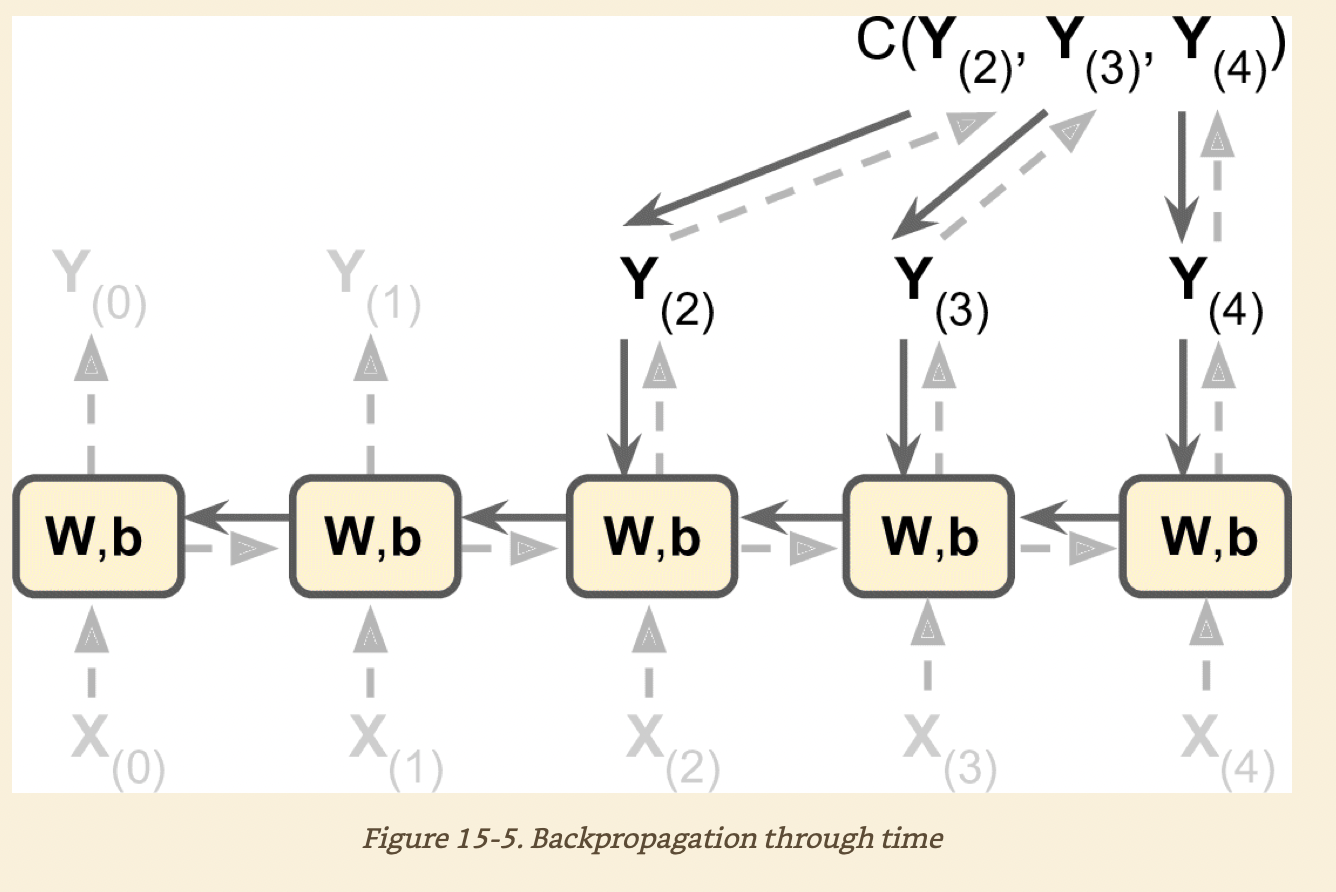

* **Implementing a deep RNN with tf.kears is quite simple: just stack recurrent layers. In this example, we use three** SimpleRNN **layers(but we could add any other type of recurrent layers)**
* **Make sure to set** return\_sequences=True **for all recurrent layers(except the last one, if you only care about the last output).**
    * **If you don't, they will output a 2D array(containing only the output of the last time step) instead of 3D array(containing outputs for all timesetpes), and the next recurrent layer will complain that you are not feeding it sequences in the expected 3D format**

In [26]:
model = keras.models.Sequential([
                                 keras.layers.SimpleRNN(20, return_sequences=True,
                                                        input_shape=[None, 1]),
                                 keras.layers.SimpleRNN(20, return_sequences=True),
                                 keras.layers.SimpleRNN(1)
])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, None, 20)          440       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 20)          820       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [24]:
optimizer = keras.optimizers.Adam(lr=0.005)
model.compile(loss='mse', optimizer=optimizer)
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 0.0034

* **The MSE reaches around 0.003. We have managed to beat the linear model.**
* **Note that the last layer is not ideal: it must have a single unit because we want to forecast a univariate time series, and this means we must have a single output value per time step.**

##### Problems with the RNN output layer
* **However, having a single unit means that the hidden state is just a single number. That's not much, and it's probably not that useful; presumably, the RNN will mostly use the hidden states of the other recurrent layers to carry over all the information it needs from time step to step and ot will noy use the finaly layer's hidden state very much.**
* **Since a** SimpleRNN **layer uses the**  tanh **activation function by default, the predicted values must lie within the range -1 to 1.**
* **It might be preferale oto replace the output layer with a** Dense **layer: it would run slightly faster, the accuracy would be roughly the same, and it would allow us to choose any output actiavtion function we want**
* **If you make this change, also make sure to remove** return\_sequences=True **from the second(not last) recurrent layer:**

In [28]:
model = keras.models.Sequential([
                                 keras.layers.SimpleRNN(20, return_sequences=True, 
                                                        input_shape=[None, 1]),
                                 keras.layers.SimpleRNN(20),
                                 keras.layers.Dense(1)
])

In [30]:
model.compile(loss="mse", optimizer=optimizer)
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 13s 58ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 2/20
219/219 [==============================] - 12s 57ms/step - loss: 0.0035 - val_loss: 0.0043
Epoch 3/20
219/219 [==============================] - 13s 58ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 4/20
219/219 [==============================] - 13s 59ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 5/20
219/219 [==============================] - 13s 58ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 6/20
219/219 [==============================] - 13s 59ms/step - loss: 0.0033 - val_loss: 0.0035
Epoch 7/20
219/219 [==============================] - 13s 58ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 8/20
219/219 [==============================] - 12s 56ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 9/20
219/219 [==============================] - 13s 58ms/step - loss: 0.0035 - val_loss: 0.0048
Epoch 10/20
219/219 [==============================] - 13s 58ms/step - loss: 0.003

### Forecasting Several Time Steps Ahead
* **So far, we have only predicted the value at the next time step, but we could just as easily have predicted the values several steps ahead by changing the targets appropriately**

#### What if we want to predict the next 10 values?
1. **The first option is to use the model we already trained, make it predict the next alue, then add tha vlaue to the inputs(acting as if this predicted value had actually occured), and use the model again to predict the following value , and so on, as in the following code:**

**Now let's use this model to predict the next 10 values. We first need to regenerate the sequences with 9 more time steps.**

In [37]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [36]:
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:, 0]

In [39]:
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_pred))

0.030335087

* **The prediction for the next step will usually be more accurate than the predictions for later time stpes, since the error might accumulate**
* **If you evalaute this approach on the validatio set, you will find an MSE of abount 0.029**
* **Compare the result with the naive approach**

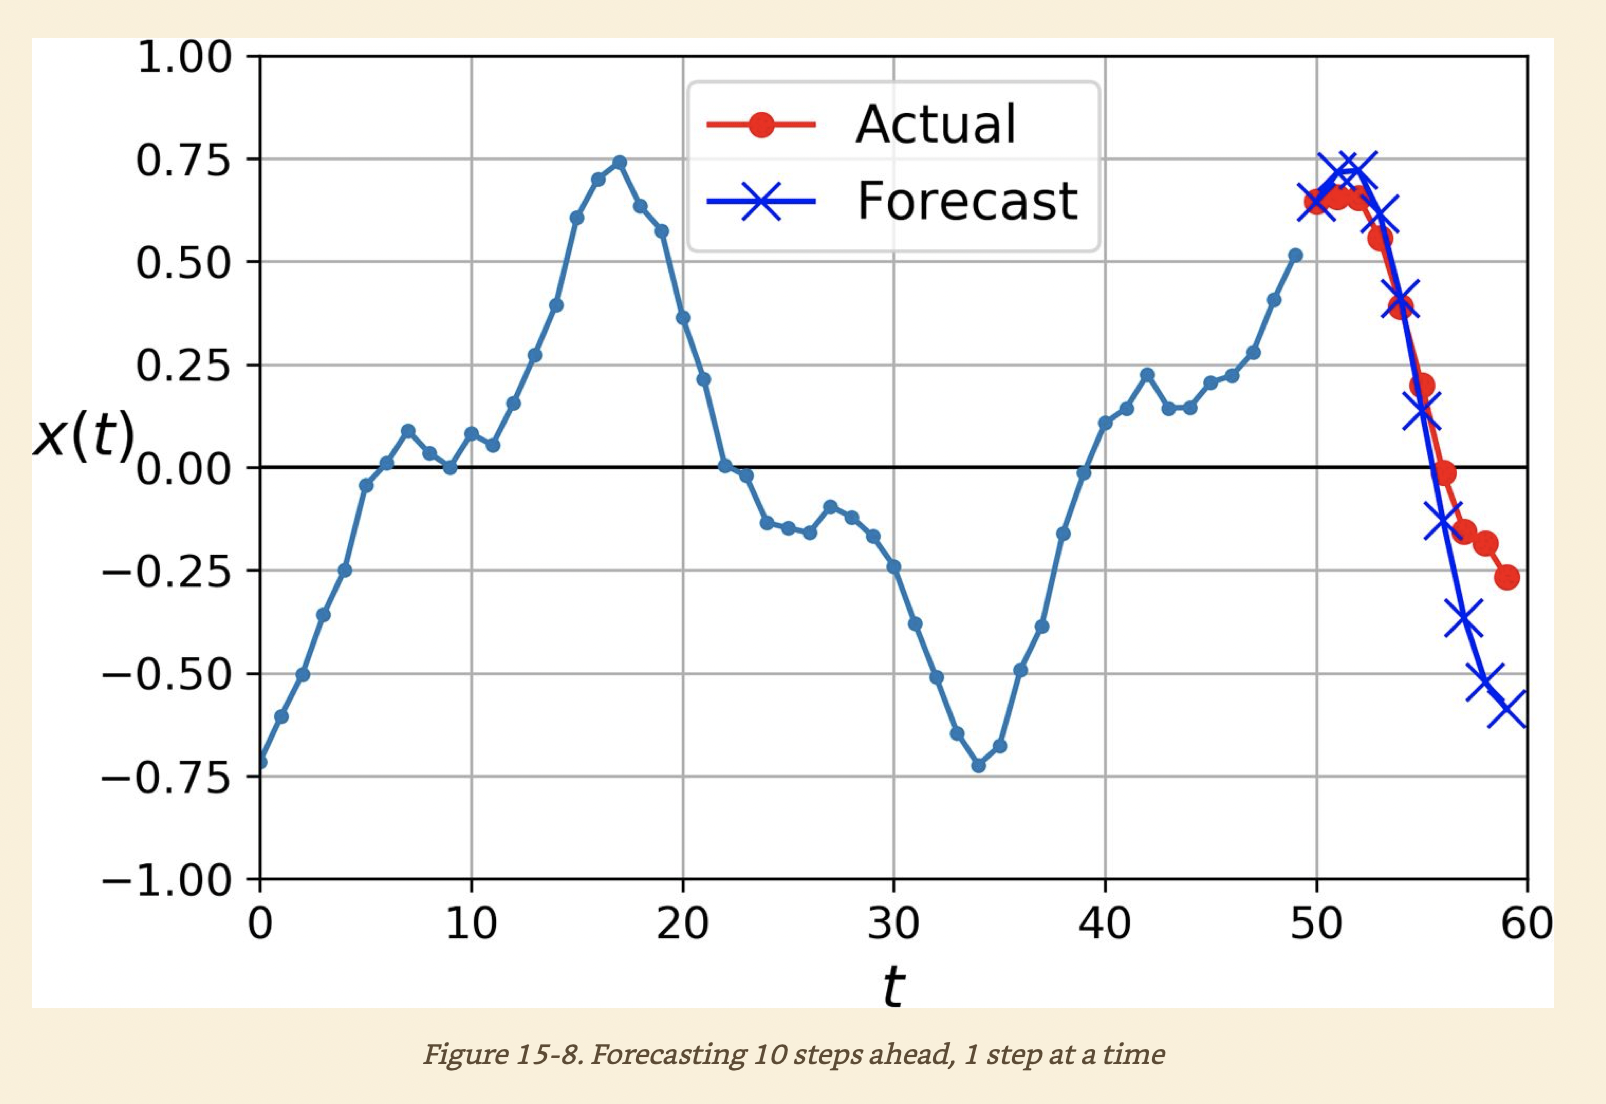

In [40]:
Y_naive_pred = Y_valid[:, -1:]
np.mean(keras.metrics.mean_squared_error(Y_valid, Y_naive_pred))

0.22278848

* **Simple linear model appraoch**

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.2116 - val_loss: 0.0638
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0565 - val_loss: 0.0428
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0409 - val_loss: 0.0349
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0338 - val_loss: 0.0309
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0301 - val_loss: 0.0284
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0273 - val_loss: 0.0263
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0264 - val_loss: 0.0249
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0248 - val_loss: 0.0242
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.0229
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.0224

* **The simple linear modle is much better than using RNN to forecasrt the future one step a a time, and also much faster to trai and run.**

2. **The second option to to train the RNN to predict all 10 next values at once. We can still use a sequence-to-vector model, but it wil output 10 values instead of 1.**
    * **However, we will first need to change the targets to be vectors containing the next 10 values.**

In [50]:
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [44]:
model = keras.models.Sequential([
                                 keras.layers.SimpleRNN(20, return_sequences=True, 
                                                        input_shape=[None, 1]),
                                 keras.layers.SimpleRNN(20),
                                 keras.layers.Dense(10)
])

In [51]:
model.compile(loss="mse", optimizer="adam")
model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=20)

Epoch 1/20
219/219 [==============================] - 14s 58ms/step - loss: 0.0949 - val_loss: 0.0289
Epoch 2/20
219/219 [==============================] - 13s 58ms/step - loss: 0.0286 - val_loss: 0.0250
Epoch 3/20
219/219 [==============================] - 13s 57ms/step - loss: 0.0254 - val_loss: 0.0202
Epoch 4/20
219/219 [==============================] - 12s 57ms/step - loss: 0.0177 - val_loss: 0.0127
Epoch 5/20
219/219 [==============================] - 12s 57ms/step - loss: 0.0129 - val_loss: 0.0112
Epoch 6/20
219/219 [==============================] - 12s 57ms/step - loss: 0.0116 - val_loss: 0.0109
Epoch 7/20
219/219 [==============================] - 12s 55ms/step - loss: 0.0109 - val_loss: 0.0111
Epoch 8/20
219/219 [==============================] - 13s 58ms/step - loss: 0.0111 - val_loss: 0.0145
Epoch 9/20
219/219 [==============================] - 12s 56ms/step - loss: 0.0106 - val_loss: 0.0109
Epoch 10/20
219/219 [==============================] - 12s 57ms/step - loss: 0.010

In [55]:
y_pred = model.predict(X_new)
y_pred.shape

(1, 10)

In [56]:
y_pred

array([[ 0.0415251 , -0.08687095, -0.21648645, -0.3488373 , -0.47012606,
        -0.5678786 , -0.60751325, -0.58581537, -0.51539767, -0.38711414]],
      dtype=float32)

* **Instead of training the model to forecast the next 10 values only at the very last tie step, we can train it to forecast the next 10 values at each and very time step.**
     * **In other words, we can turn this sequence-to-vector RNN into a sequence-to-sequence RNN.**
     * **The advantage of this technique is that the loss will contain a term for the output of the RNN at each and every time step, not just the output at the last time step. This measn there will be many more error gradients flowing through the model, and they won't have to flow only through time; they will also flow from the output of each time step.**
     * **This will both stabilize and speed up training.**
* **To be clear, at time step 0 the model will ouput a vector containing the forecasts for time stpes 1 to 10, then at time stpe 1 the model will forecast stpes 2 to 11, and so on.**
    * **So each target must be a sequence of the same length as the input sequence, containing 10-dimensional vector at each step**

**Let's prepare these target sequences**

In [64]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

* **It may be suprising that the targets will contian values that appear in the inputs. At each step, the model only knows about past time steps, so it cannot look ahead. It is said to be a *casual model*.**

* **To turn the model into a sequence-to-sequence model, we mus set** return_sequences=True **in all recurrent layers(even the last one), and we must apply the output** Dense **layer at every time step.**
* **Keras oofers a** TimeDistributed **layer **for this very purpose: it wraps any layer(e.g., a** Dense **layer) and applies it at every time step of its input sequence. It does this efficiently, by reshapng the inputs so that each time step is treated as a separate instance(i.e., it reshapes inputs from \[batch size, time steps, input dimensions\] to [batch size x stpes, input x dimensions]; in this example, the number of input dimensions is 20 because the previous** SimpleRNN **layer has 20 units), then it runs the** Dense **layer, and finally it reshapes the output back to sequences(i.e., it reshapes the outputs from** [batch size x time steps, output dimensions] **to** [batch size, time steps, output dimensions]. **In this example the number of output dimension is 10, since the** Dense **layer has 10 units)**


In [58]:
model = keras.models.Sequential([
                                 keras.layers.SimpleRNN(20, return_sequences=True,
                                                        input_shape=[None, 1]),
                                 keras.layers.SimpleRNN(20, return_sequences=True),
                                 keras.layers.TimeDistributed(keras.layers.Dense(10))
])

* **The** Dense **layer actually supports sequences as inputs: it handles them just like** TimeDistributed(Dense(...)), **meaning it is applied to the last input dimension only(independent across all time steps).**

* **All outputs are needed during training, but only the output at the last time step is useful for predictions and for evaluations.**
* **So although we will rely on the MSE oer all the outputs for training, we will use a custom metric for evaluation, to only compute the MSE over the output at the last time step.**

In [59]:
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

In [60]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

In [65]:
model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 14s 60ms/step - loss: 0.0507 - last_time_step_mse: 0.0402 - val_loss: 0.0411 - val_last_time_step_mse: 0.0297
Epoch 2/20
219/219 [==============================] - 13s 58ms/step - loss: 0.0357 - last_time_step_mse: 0.0233 - val_loss: 0.0350 - val_last_time_step_mse: 0.0249
Epoch 3/20
219/219 [==============================] - 13s 61ms/step - loss: 0.0299 - last_time_step_mse: 0.0171 - val_loss: 0.0268 - val_last_time_step_mse: 0.0139
Epoch 4/20
219/219 [==============================] - 13s 58ms/step - loss: 0.0262 - last_time_step_mse: 0.0133 - val_loss: 0.0264 - val_last_time_step_mse: 0.0144
Epoch 5/20
219/219 [==============================] - 13s 58ms/step - loss: 0.0241 - last_time_step_mse: 0.0115 - val_loss: 0.0229 - val_last_time_step_mse: 0.0108
Epoch 6/20
219/219 [==============================] - 13s 58ms/step - loss: 0.0223 - last_time_step_mse: 0.0099 - val_loss: 0.0204 - val_last_time_step_mse: 0.0080
Epoch 7/20
219/2

* **You can combine this approac with the first one: just predict the next 10 values using this RNN, then concatenate these values to the input time series and use the model aain to predict the next 10 values, and repeat the process as many times as needed. With this approach, you can generate arbitrarily long sequences.**

## Handling Long Sequences
* **Simple RNNs can be quite good at forecasting time series or handling other kinds of sequences, but they do not perform as weel on long time series or sequences.**
* **To trian a RNN on long sequences, we must run it over many time steps, making the unrolled RNN a very deep network.**
    * **Just like any deep neural network, it may suffer from the unstable gradients problem: it may take forever to train, or training may be unstable.**
    * **Moreover, when an RNN processs a long seuqence, it will gradually forget the first inputs in the sequence.**

### FIghting the Unstable Gradients Problem
* **Many of the tricks we used in deep nnets to alleviate the unstable gradients problem can also be used for RNNs: good parameter initailization, faster optimizers, dropou, and so on.**
* **Non-saturating activation functions(e.g., ReLU) may not help as much here; in fact, they may actually lead the RNN to be even more unstable during training.**
    * **Suppose Gradient Descent updates the weights in a way that increases the outputs slightly at the first time step. Because the same weights are used at every time step, the outputs at the second time step may be also be slightly increased, and those at the third, and so on until the outputs explode-and a nonsaturaing activation function does not prevent that. **
* **You can reduce the risk of exploding outputs by using a smaller learning rate, but you can also simply use a saturating activation function like the hyperbolic tangent.**
* **Batch Normalization cannot be used as efficiently with RNNs as with deep feedforward nets. In fact, you cannot use it between time stpes, only between recurrent layers.**
    * **BN was slightly beneficial only when it was applied to the inputs, not to the hidden states. In other words, it was slightly beneficial only when it was applied between recurrent layers(i.e., vertically), but not within recurrent layers(i.e., horizontally).**
    * **In keras this can be simply done by adding** BatchNormalization **layer before each recurrent layer.**
* **Another for of normalization oftwn works better with RNNs: *Layer Normailization.***
    * **Instead of normalizing across the batch dimension, it normalizes across the feature dimension. One advantage is that it can compute the required statistics on the fly, at each time step, independently for each instance.**
    * **This measn that it behaves the same way during training and testing(as poosed to BN), and it does not need to use exponentail moving averages to estimate the feature statiscs across all instances in the training set.**
    * **Like BN, layer normalization learns a scale and offset parameter for each input. In an RNN, it is typically used right after the linear combination of the inputs and hidden states.**

* **Let's use tf.keras to implement Layer Normalization within a simple memory cell.**
* **The** call( ) **method caontians two arguments: the inputs at the current time step and hidden states from the previous time step.**
* **Note that the states argument is a list containing one or more tensors. In the case of a simple RNN cell it contains a single tensor equal to the outputs of the previous tie step, but other cells may have multiple state tensors(e.g., an** LSTM **cell has a long-term state and a short-term state).**
* **A cell must also have a** state\_size **attribute and an** output\_size **attribue. In a simple RNN, both are simply equal to the number of units.**
* **The following code implements a custom memory cell which will behave like a** SimpleRNNCell, **except it will also apply Layer Normalizaion at each time step:**

In [68]:
class LNSimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units,
                                                          activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)
    
    def call(self, inputs, states):
        outputs,new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

* **The contructor takes the number of units and the desired activation function, and it sets the state_size and output_size attributes, then creates a** SimpleRNNCell **with no actiavtion function(because we want to perform Layer Normalization after the linear operation but before the activation function.)**
* **Then the constructor creates the** LayerNormalization **layer, and finally fethces the desired activation function.**
* **The** call( ) **method starts by applying the simple RNN cell, which computes a linear combination of the current inputs and previous hidden states, and it returns the result twice(indeed, in a** SimpleRNNCell, **the outputs are just equal to the hidden states**)
* **Next the call( ) method applies Layer Normalization, followed by the activation function. Finally, ti returns the outputs twice(once as the outputs, and once as the new hidden states).**
* **To use this custom cell, all we need to do is create a** keras.layers.RNN **layer, passing it a cell instance.**

In [69]:
model = keras.models.Sequential([
                                 keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True,
                                                  input_shape=[None, 1]),
                                 keras.layers.RNN(LNSimpleRNNCell(20), return_sequences=True),
                                 keras.layers.TimeDistributed(keras.layers.Dense(10))
])

* **Similarly, you could create a custom cell to apply dropout between each time step.**
* **All recurrent layers(excpet for keras.layers.RNN) and all cells provided  by Keras have a dropout hyperparameter and a recurrent\_dropout hyperparameter: the former defiens the dropout rate to apply to the inputs(at each time step), and the latter defines the dropout rate for the hidden states(also at each time step). No need to create a custom cell to apply dropout at each time step in an RNN.**